In [1]:
import sys
sys.path.append('../')

import pandas as pd
import json

import stock_service as sv
import load_transform as lf 

In [2]:
sv.run().keys()

dict_keys(['meta_data', 'data_for_all_days'])

In [3]:
data_for_all_days = pd.read_json(json
    .dumps(sv
    .run()['data_for_all_days'], ensure_ascii=False))\
    .T

In [4]:
CYN_cols = [col for col in data_for_all_days.columns if 'CNY' in col]
USD_cols = [col for col in data_for_all_days.columns if 'USD' in col]

In [5]:
df = data_for_all_days[USD_cols]
df.head()

,1b. open (USD),2b. high (USD),3b. low (USD),4b. close (USD),6. market cap (USD)
2020-07-12,9234.02,9268.52,9230.61,9259.99,688.296306
2020-07-11,9288.34,9299.28,9178.25,9234.03,22561.366000
2020-07-10,9232.42,9317.48,9125.00,9288.34,38295.494006
2020-07-09,9436.06,9440.79,9160.00,9232.43,48044.450645
2020-07-08,9257.40,9470.00,9231.00,9436.06,56140.517781


In [6]:
df.columns.tolist() 

['1b. open (USD)',
 '2b. high (USD)',
 '3b. low (USD)',
 '4b. close (USD)',
 '6. market cap (USD)']

In [7]:
df.head()

,1b. open (USD),2b. high (USD),3b. low (USD),4b. close (USD),6. market cap (USD)
2020-07-12,9234.02,9268.52,9230.61,9259.99,688.296306
2020-07-11,9288.34,9299.28,9178.25,9234.03,22561.366000
2020-07-10,9232.42,9317.48,9125.00,9288.34,38295.494006
2020-07-09,9436.06,9440.79,9160.00,9232.43,48044.450645
2020-07-08,9257.40,9470.00,9231.00,9436.06,56140.517781


In [8]:
lf.transform_in_fourcolumns(df)

/home/aantunesnds/.local/share/virtualenvs/stock-market-6rWeV0cO/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/aantunesnds/.local/share/virtualenvs/stock-market-6rWeV0cO/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,open,high,low,close
2020-07-12,9234.02,9268.52,9230.61,9259.99
2020-07-11,9288.34,9299.28,9178.25,9234.03
2020-07-10,9232.42,9317.48,9125.00,9288.34
2020-07-09,9436.06,9440.79,9160.00,9232.43
2020-07-08,9257.40,9470.00,9231.00,9436.06
...,...,...,...,...
2017-10-21,6013.72,6171.00,5850.03,6024.97
2017-10-20,5683.31,6110.00,5600.00,6010.01
2017-10-19,5513.00,5710.00,5490.26,5683.90
2017-10-18,5595.00,5596.00,5037.95,5512.06


/home/aantunesnds/.local/share/virtualenvs/stock-market-6rWeV0cO/lib/python3.6/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


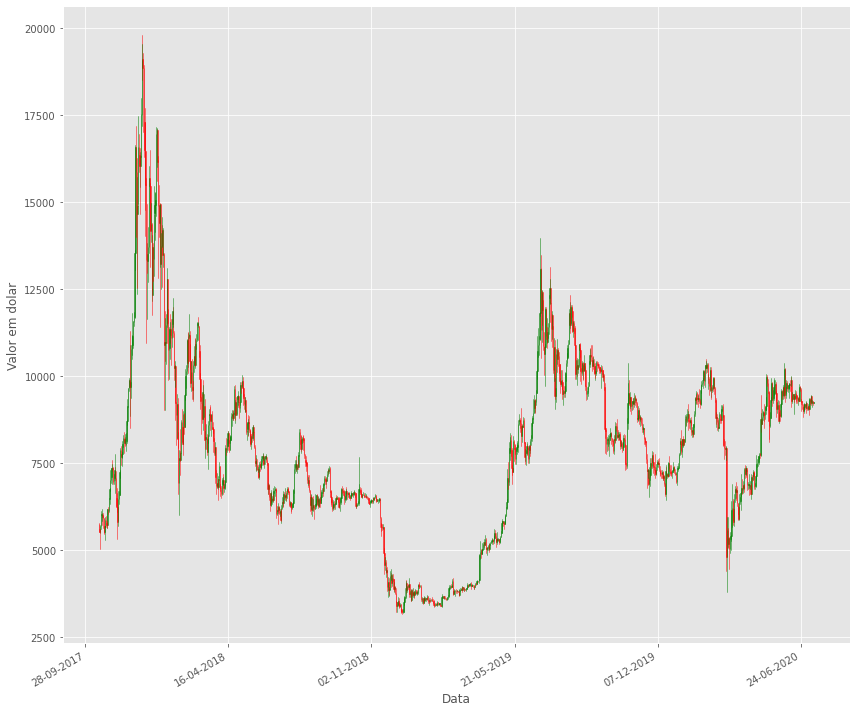

In [9]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
 
def plot_candle(df):
    
    def tranform_data_to_candle(df):
        df['date'] = df.index
        df['date'] = df['date'].apply(mpl_dates.date2num)
        df = df.astype(float)
        df = df[['date', 'open', 'high', 'low', 'close']]
        return df
    
    df = tranform_data_to_candle(df)
    # Creating Subplots
    fig, ax = plt.subplots(figsize=(12,10))

    candlestick_ohlc(ax, 
                     df.values, 
                     width=0.6, 
                     colorup='green', 
                     colordown='red', 
                     alpha=0.8)

    # Setting labels & titles
    ax.set_xlabel('Data')
    ax.set_ylabel('Valor em dolar')

    # Formatting Date
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    return plt.show()

df = lf.load_data_btc(sv.run()['data_for_all_days'], 'USD')
df = lf.transform_in_fourcolumns(df)
plot_candle(df)